# Preliminary Modelling

In [1]:
import random

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

## Model 1

Then to set up the variables for the model. In this first example the populations have an initial value of 100, and a decay rate of 1%. For each enzyme there is a chance that it will combine with a circle or a triangle at each step.

In [28]:
# Initializing the simulation size
number_of_steps = 1000
circle_population = np.zeros(number_of_steps)
triangle_population = np.zeros(number_of_steps)

# Defining the inital population
circle_population[0] = 100
triangle_population[0] = 100

# The chance a protein will combine with an enzyme
triangle_chance = 0.2
circle_chance = 0.1

# How many proteins are produced each step
circle_production = 2
triangle_production = 0

enzyme_population = 10
decay_rate = 0.005

for i in range(1, number_of_steps):
    triangle_population[i] = max(
        0, triangle_population[i-1]*(1-decay_rate) + triangle_production
    )
    circle_population[i] = max(0, circle_population[i-1]*(1-decay_rate) + circle_production)
    for _ in range(0, enzyme_population):
        chance = random.random()

        if 0 <= chance < circle_chance and circle_population[i] >= 1:
            circle_population[i] = circle_population[i] - 1
        elif circle_chance <= chance < triangle_chance + circle_chance and triangle_population[i] >= 1:
            triangle_population[i] = triangle_population[i] - 1
        else:
            pass

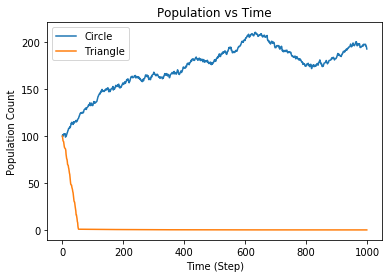

In [29]:
plt.plot(np.arange(0, number_of_steps), circle_population)
plt.plot(np.arange(0, number_of_steps), triangle_population)
plt.title("Population vs Time")
plt.legend(["Circle", "Triangle"])
plt.xlabel("Time (Step)")
plt.ylabel("Population Count")
plt.show()